<b>Question2.3: Evaluate the performance of networks with 1, 2 or 3 layers and report on your findings.</b>

<b>1 Convolution Layer</b>

In [25]:
# Copyright 2016 The TensorFlow Authors. All Rights Reserved.
#
#  Licensed under the Apache License, Version 2.0 (the "License");
#  you may not use this file except in compliance with the License.
#  You may obtain a copy of the License at
#
#   http://www.apache.org/licenses/LICENSE-2.0
#
#  Unless required by applicable law or agreed to in writing, software
#  distributed under the License is distributed on an "AS IS" BASIS,
#  WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
#  See the License for the specific language governing permissions and
#  limitations under the License.
"""Convolutional Neural Network Estimator for MNIST, built with tf.layers."""

from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import numpy as np
import tensorflow as tf
import sys
import matplotlib.pyplot as plt
#tf.logging.set_verbosity(tf.logging.INFO)
classes = [0,1,2,3]    #####REDUCED THE NUMBER OF CLASSES BECAUSE THE PC IS SLOW
num_classes = len(classes)

def my_cnn_model_fn(features, labels, mode):
  """Model function for CNN."""
  # Input Layer
  # Reshape X to 4-D tensor: [batch_size, width, height, channels]
  # MNIST images are 28x28 pixels, and have one color channel
  input_layer = tf.reshape(features["x"], [-1, 28, 28, 1])

  # Convolutional Layer #1
  # Computes 32 features using a 5x5 filter with ReLU activation.
  # Padding is added to preserve width and height.
  # Input Tensor Shape: [batch_size, 28, 28, 1]
  # Output Tensor Shape: [batch_size, 28, 28, 32]
  conv1 = tf.layers.conv2d(
      inputs=input_layer,
      filters=32,
      kernel_size=[5, 5],
      padding="same",
      activation=tf.nn.relu)

  # Pooling Layer #1
  # First max pooling layer with a 2x2 filter and stride of 2
  # Input Tensor Shape: [batch_size, 28, 28, 32]
  # Output Tensor Shape: [batch_size, 14, 14, 32]
  pool1 = tf.layers.max_pooling2d(inputs=conv1, pool_size=[2, 2], strides=2)

  # Flatten tensor into a batch of vectors
  # Input Tensor Shape: [batch_size, 14, 14, 64]
  # Output Tensor Shape: [batch_size, 14 * 14 * 32]
  pool1_flat = tf.reshape(pool1, [-1, 14 * 14 * 32])

  # Dense Layer
  # Densely connected layer with 1024 neurons
  # Input Tensor Shape: [batch_size, 14 * 14 * 32]
  # Output Tensor Shape: [batch_size, 1024]
  dense = tf.layers.dense(inputs=pool1_flat, units=1024, activation=tf.nn.relu)

  # Add dropout operation; 0.6 probability that element will be kept
  dropout = tf.layers.dropout(
      inputs=dense, rate=0.4, training=mode == tf.estimator.ModeKeys.TRAIN)

  # Logits layer
  # Input Tensor Shape: [batch_size, 1024]
  # Output Tensor Shape: [batch_size, 10]
  logits = tf.layers.dense(inputs=dropout, units= num_classes)

  predictions = {
      # Generate predictions (for PREDICT and EVAL mode)
      "classes": tf.argmax(input=logits, axis=1),
      # Add `softmax_tensor` to the graph. It is used for PREDICT and by the
      # `logging_hook`.
      "probabilities": tf.nn.softmax(logits, name="softmax_tensor")
  }
  if mode == tf.estimator.ModeKeys.PREDICT:
    return tf.estimator.EstimatorSpec(mode=mode, predictions=predictions)

  # Calculate Loss (for both TRAIN and EVAL modes)
  loss = tf.losses.sparse_softmax_cross_entropy(labels=labels, logits=logits)

  # Configure the Training Op (for TRAIN mode)
  if mode == tf.estimator.ModeKeys.TRAIN:
    optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.001)
    train_op = optimizer.minimize(
        loss=loss,
        global_step=tf.train.get_global_step())
    return tf.estimator.EstimatorSpec(mode=mode, loss=loss, train_op=train_op)

 #  Add evaluation metrics (for EVAL mode)
  eval_metric_ops = {
      "accuracy": tf.metrics.accuracy(
          labels=labels, predictions=predictions["classes"])}
  return tf.estimator.EstimatorSpec(
      mode=mode, loss=loss, eval_metric_ops=eval_metric_ops)


#  # Load training and eval data
mnist = tf.contrib.learn.datasets.load_dataset("mnist")
  
train_data = mnist.train.images  # Returns np.array
train_labels = np.asarray(mnist.train.labels, dtype=np.int32)
indices = np.isin(train_labels,classes)
sample_train_data = train_data[indices,:]
sample_train_labels = train_labels[indices]

eval_data = mnist.test.images  # Returns np.array
eval_labels = np.asarray(mnist.test.labels, dtype=np.int32)
indices_test = np.isin(eval_labels,classes)
sample_eval_data = eval_data[indices_test,:]
sample_eval_labels = eval_labels[indices_test]

  # Create the Estimator
mnist_classifier = tf.estimator.Estimator(
      model_fn=my_cnn_model_fn)#, model_dir="/tmp/mnist_convnet_model")

Extracting MNIST-data\train-images-idx3-ubyte.gz
Extracting MNIST-data\train-labels-idx1-ubyte.gz
Extracting MNIST-data\t10k-images-idx3-ubyte.gz
Extracting MNIST-data\t10k-labels-idx1-ubyte.gz
INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_task_id': 0, '_service': None, '_log_step_count_steps': 100, '_session_config': None, '_save_summary_steps': 100, '_task_type': 'worker', '_keep_checkpoint_max': 5, '_tf_random_seed': None, '_save_checkpoints_secs': 600, '_num_ps_replicas': 0, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x000002969FD7A898>, '_num_worker_replicas': 1, '_model_dir': 'C:\\Users\\shilp\\AppData\\Local\\Temp\\tmpnjt7n0s2', '_keep_checkpoint_every_n_hours': 10000, '_master': '', '_save_checkpoints_steps': None, '_is_chief': True}


INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Restoring parameters from C:\Users\shilp\AppData\Local\Temp\tmpnjt7n0s2\model.ckpt-500
INFO:tensorflow:Saving checkpoints for 501 into C:\Users\shilp\AppData\Local\Temp\tmpnjt7n0s2\model.ckpt.
INFO:tensorflow:step = 501, loss = 0.68869793
INFO:tensorflow:Saving checkpoints for 600 into C:\Users\shilp\AppData\Local\Temp\tmpnjt7n0s2\model.ckpt.
INFO:tensorflow:Loss for final step: 0.58277833.
INFO:tensorflow:Starting evaluation at 2018-03-22-15:41:37
INFO:tensorflow:Restoring parameters from C:\Users\shilp\AppData\Local\Temp\tmpnjt7n0s2\model.ckpt-600
INFO:tensorflow:Finished evaluation at 2018-03-22-15:41:49
INFO:tensorflow:Saving dict for global step 600: accuracy = 0.9511667, global_step = 600, loss = 0.5151402

For iteration  1  in 1 Convolution Layer with batch size: 10  the accuracy is : 0.9511667

INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Restoring parameters from C:\Users\shilp\AppData\Local\Temp\tmpnjt

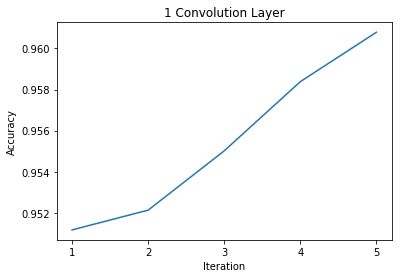

In [27]:
acc1=[]
# Train the model with 1 Convolution Layer
for i  in range(1,6):
    train_input_fn = tf.estimator.inputs.numpy_input_fn(
        x={"x": sample_train_data},
        y=sample_train_labels,
        batch_size=10*i,
#        batch_size=10*i,
        num_epochs=None,
        shuffle=True)
    mnist_classifier.train(
    input_fn=train_input_fn,
    steps=100)
#    steps=100)
    eval_input_fn = tf.estimator.inputs.numpy_input_fn(
        x={"x": sample_eval_data},
        y=sample_eval_labels,
        batch_size=10*i,
#        batch_size=10*i,
        num_epochs=1,
        shuffle=False)
    eval_results1 = mnist_classifier.evaluate(input_fn=eval_input_fn)
    print("")
    print("For iteration ",i," in 1 Convolution Layer with batch size:",10*i," the accuracy is :",eval_results1["accuracy"])
    print("")
    acc1 =np.append(acc1,eval_results1['accuracy'])
                    
print("")

t=[1,2,3,4,5]
x= [i for i in range(len(t))]
plt.plot(acc1)
plt.xlabel("Iteration")
plt.xticks(x,t)
plt.ylabel("Accuracy")
plt.title("1 Convolution Layer")
plt.show()

<b>2 Convolution Layer</b>

In [23]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import numpy as np
import tensorflow as tf
import sys
#tf.logging.set_verbosity(tf.logging.INFO)
classes = [0,1,2,3]    #####REDUCED THE NUMBER OF CLASSES BECAUSE THE PC IS SLOW
num_classes = len(classes)

def my_cnn_model_fn(features, labels, mode):
  """Model function for CNN."""
  # Input Layer
  input_layer = tf.reshape(features["x"], [-1, 28, 28, 1])

  # Convolutional Layer #1
  conv1 = tf.layers.conv2d(
      inputs=input_layer,
      filters=32,
      kernel_size=[5, 5],
      padding="same",
      activation=tf.nn.relu)

  # Pooling Layer #1
  pool1 = tf.layers.max_pooling2d(inputs=conv1, pool_size=[2, 2], strides=2)

  # Convolutional Layer #2
  conv2 = tf.layers.conv2d(
      inputs=pool1,
      filters=64,
      kernel_size=[5, 5],
      padding="same",
      activation=tf.nn.relu)

  # Pooling Layer #2
  pool2 = tf.layers.max_pooling2d(inputs=conv2, pool_size=[2, 2], strides=2)

  # Flatten tensor into a batch of vectors
  pool2_flat = tf.reshape(pool2, [-1, 7 * 7 * 64])

  # Dense Layer
  dense = tf.layers.dense(inputs=pool2_flat, units=1024, activation=tf.nn.relu)

  # Add dropout operation; 0.6 probability that element will be kept
  dropout = tf.layers.dropout(
      inputs=dense, rate=0.4, training=mode == tf.estimator.ModeKeys.TRAIN)

  # Logits layer
  logits = tf.layers.dense(inputs=dropout, units= num_classes)

  predictions = {
      # Generate predictions (for PREDICT and EVAL mode)
      "classes": tf.argmax(input=logits, axis=1),
      # Add `softmax_tensor` to the graph. It is used for PREDICT and by the
      # `logging_hook`.
      "probabilities": tf.nn.softmax(logits, name="softmax_tensor")
  }
  if mode == tf.estimator.ModeKeys.PREDICT:
    return tf.estimator.EstimatorSpec(mode=mode, predictions=predictions)

  # Calculate Loss (for both TRAIN and EVAL modes)
  loss = tf.losses.sparse_softmax_cross_entropy(labels=labels, logits=logits)

  # Configure the Training Op (for TRAIN mode)
  if mode == tf.estimator.ModeKeys.TRAIN:
    optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.001)
    train_op = optimizer.minimize(
        loss=loss,
        global_step=tf.train.get_global_step())
    return tf.estimator.EstimatorSpec(mode=mode, loss=loss, train_op=train_op)

 #  Add evaluation metrics (for EVAL mode)
  eval_metric_ops = {
      "accuracy": tf.metrics.accuracy(
          labels=labels, predictions=predictions["classes"])}
  return tf.estimator.EstimatorSpec(
      mode=mode, loss=loss, eval_metric_ops=eval_metric_ops)


#  # Load training and eval data
mnist = tf.contrib.learn.datasets.load_dataset("mnist")
  
train_data = mnist.train.images  # Returns np.array
train_labels = np.asarray(mnist.train.labels, dtype=np.int32)
indices = np.isin(train_labels,classes)
sample_train_data = train_data[indices,:]
sample_train_labels = train_labels[indices]

eval_data = mnist.test.images  # Returns np.array
eval_labels = np.asarray(mnist.test.labels, dtype=np.int32)
indices_test = np.isin(eval_labels,classes)
sample_eval_data = eval_data[indices_test,:]
sample_eval_labels = eval_labels[indices_test]

  # Create the Estimator
mnist_classifier = tf.estimator.Estimator(
      model_fn=my_cnn_model_fn)#, model_dir="/tmp/mnist_convnet_model")



Extracting MNIST-data\train-images-idx3-ubyte.gz
Extracting MNIST-data\train-labels-idx1-ubyte.gz
Extracting MNIST-data\t10k-images-idx3-ubyte.gz
Extracting MNIST-data\t10k-labels-idx1-ubyte.gz
INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_task_id': 0, '_service': None, '_log_step_count_steps': 100, '_session_config': None, '_save_summary_steps': 100, '_task_type': 'worker', '_keep_checkpoint_max': 5, '_tf_random_seed': None, '_save_checkpoints_secs': 600, '_num_ps_replicas': 0, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x000002969F668390>, '_num_worker_replicas': 1, '_model_dir': 'C:\\Users\\shilp\\AppData\\Local\\Temp\\tmpvy4t6vd_', '_keep_checkpoint_every_n_hours': 10000, '_master': '', '_save_checkpoints_steps': None, '_is_chief': True}


INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Saving checkpoints for 1 into C:\Users\shilp\AppData\Local\Temp\tmpvy4t6vd_\model.ckpt.
INFO:tensorflow:step = 1, loss = 1.3994522
INFO:tensorflow:Saving checkpoints for 100 into C:\Users\shilp\AppData\Local\Temp\tmpvy4t6vd_\model.ckpt.
INFO:tensorflow:Loss for final step: 1.2955219.
INFO:tensorflow:Starting evaluation at 2018-03-22-15:17:13
INFO:tensorflow:Restoring parameters from C:\Users\shilp\AppData\Local\Temp\tmpvy4t6vd_\model.ckpt-100
INFO:tensorflow:Finished evaluation at 2018-03-22-15:17:34
INFO:tensorflow:Saving dict for global step 100: accuracy = 0.32018283, global_step = 100, loss = 1.3579597

For iteration  1  in 2 Convolution Layer with batch size: 5  the accuracy is : 0.32018283

INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Restoring parameters from C:\Users\shilp\AppData\Local\Temp\tmpvy4t6vd_\model.ckpt-100
INFO:tensorflow:Saving checkpoints for 101 into C:\Users\shilp\AppData\Local\Temp\tmpvy

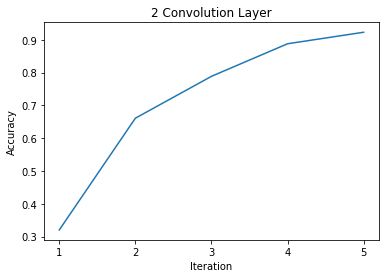

In [24]:
acc2=[]
# Train the model
for i  in range(1,6):
    train_input_fn = tf.estimator.inputs.numpy_input_fn(
        x={"x": sample_train_data},
        y=sample_train_labels,
#        batch_size=5*i,
        batch_size=5*i,
        num_epochs=None,
        shuffle=True)
    mnist_classifier.train(
    input_fn=train_input_fn,
    steps=100)
    eval_input_fn = tf.estimator.inputs.numpy_input_fn(
        x={"x": sample_eval_data},
        y=sample_eval_labels,
#        batch_size=5*i,
        batch_size=5*i,
        num_epochs=1,
        shuffle=False)
    eval_results2 = mnist_classifier.evaluate(input_fn=eval_input_fn)
    print("")
    print("For iteration ",i," in 2 Convolution Layer with batch size:",5*i," the accuracy is :",eval_results2["accuracy"])
    print("")
    acc2 =np.append(acc2,eval_results2['accuracy'])
                    
print("")

t=[1,2,3,4,5]
x= [i for i in range(len(t))]
plt.plot(acc2)
plt.xlabel("Iteration")
plt.xticks(x,t)
plt.ylabel("Accuracy")
plt.title("2 Convolution Layer")
plt.show()

<b>3 Convolution Layer</b>

In [19]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import numpy as np
import tensorflow as tf
import sys
#tf.logging.set_verbosity(tf.logging.INFO)
classes = [0,1,2,3]    #####REDUCED THE NUMBER OF CLASSES BECAUSE THE PC IS SLOW
num_classes = len(classes)

def my_cnn_model_fn(features, labels, mode):
  """Model function for CNN."""
  # Input Layer
  # Reshape X to 4-D tensor: [batch_size, width, height, channels]
  # MNIST images are 28x28 pixels, and have one color channel
  input_layer = tf.reshape(features["x"], [-1, 28, 28, 1])

  # Convolutional Layer #1
  # Computes 32 features using a 5x5 filter with ReLU activation.
  # Padding is added to preserve width and height.
  # Input Tensor Shape: [batch_size, 28, 28, 1]
  # Output Tensor Shape: [batch_size, 28, 28, 32]
  conv1 = tf.layers.conv2d(
      inputs=input_layer,
      filters=32,
      kernel_size=[5, 5],
      padding="same",
      activation=tf.nn.relu)

  # Pooling Layer #1
  # First max pooling layer with a 2x2 filter and stride of 2
  # Input Tensor Shape: [batch_size, 28, 28, 32]
  # Output Tensor Shape: [batch_size, 14, 14, 32]
  pool1 = tf.layers.max_pooling2d(inputs=conv1, pool_size=[2, 2], strides=2)

  # Convolutional Layer #2
  # Computes 64 features using a 5x5 filter.
  # Padding is added to preserve width and height.
  # Input Tensor Shape: [batch_size, 14, 14, 32]
  # Output Tensor Shape: [batch_size, 14, 14, 64]
  conv2 = tf.layers.conv2d(
      inputs=pool1,
      filters=64,
      kernel_size=[5, 5],
      padding="same",
      activation=tf.nn.relu)

  # Pooling Layer #2
  # Second max pooling layer with a 2x2 filter and stride of 2
  # Input Tensor Shape: [batch_size, 14, 14, 64]
  # Output Tensor Shape: [batch_size, 7, 7, 64]
  pool2 = tf.layers.max_pooling2d(inputs=conv2, pool_size=[2, 2], strides=2)

  # Convolutional Layer #3
  # Computes 78 features using a 2x2 filter.
  # Padding is added to preserve width and height.
  # Input Tensor Shape: [batch_size, 7, 7, 64]
  # Output Tensor Shape: [batch_size, 6, 6, 78]
  conv3 = tf.layers.conv2d(
      inputs=pool2,
      filters=78,
      kernel_size=[5, 5],
      padding="same",
      activation=tf.nn.relu)

  # Pooling Layer #3
  # Third max pooling layer with a 2x2 filter and stride of 2
  # Input Tensor Shape: [batch_size, 3, 3, 78]
  # Output Tensor Shape: [batch_size, 3, 3, 78]
  pool3 = tf.layers.max_pooling2d(inputs=conv3, pool_size=[2, 2], strides=2)

  # Flatten tensor into a batch of vectors
  # Input Tensor Shape: [batch_size, 3, 3, 78]
  # Output Tensor Shape: [batch_size, 3 * 3 * 78]
  pool3_flat = tf.reshape(pool3, [-1, 3 * 3 * 78])

  # Dense Layer
  # Densely connected layer with 1024 neurons
  # Input Tensor Shape:  [batch_size, 3 * 3 * 78]
  # Output Tensor Shape: [batch_size, 1024]
  dense = tf.layers.dense(inputs=pool3_flat, units=1024, activation=tf.nn.relu)

  # Add dropout operation; 0.6 probability that element will be kept
  dropout = tf.layers.dropout(
      inputs=dense, rate=0.4, training=mode == tf.estimator.ModeKeys.TRAIN)

  # Logits layer
  # Input Tensor Shape: [batch_size, 1024]
  # Output Tensor Shape: [batch_size, 10]
  logits = tf.layers.dense(inputs=dropout, units= num_classes)

  predictions = {
      # Generate predictions (for PREDICT and EVAL mode)
      "classes": tf.argmax(input=logits, axis=1),
      # Add `softmax_tensor` to the graph. It is used for PREDICT and by the
      # `logging_hook`.
      "probabilities": tf.nn.softmax(logits, name="softmax_tensor")
  }
  if mode == tf.estimator.ModeKeys.PREDICT:
    return tf.estimator.EstimatorSpec(mode=mode, predictions=predictions)

  # Calculate Loss (for both TRAIN and EVAL modes)
  loss = tf.losses.sparse_softmax_cross_entropy(labels=labels, logits=logits)

  # Configure the Training Op (for TRAIN mode)
  if mode == tf.estimator.ModeKeys.TRAIN:
    optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.001)
    train_op = optimizer.minimize(
        loss=loss,
        global_step=tf.train.get_global_step())
    return tf.estimator.EstimatorSpec(mode=mode, loss=loss, train_op=train_op)

 #  Add evaluation metrics (for EVAL mode)
  eval_metric_ops = {
      "accuracy": tf.metrics.accuracy(
          labels=labels, predictions=predictions["classes"])}
  return tf.estimator.EstimatorSpec(
      mode=mode, loss=loss, eval_metric_ops=eval_metric_ops)


#  # Load training and eval data
mnist = tf.contrib.learn.datasets.load_dataset("mnist")
  
train_data = mnist.train.images  # Returns np.array
train_labels = np.asarray(mnist.train.labels, dtype=np.int32)
indices = np.isin(train_labels,classes)
sample_train_data = train_data[indices,:]
sample_train_labels = train_labels[indices]

eval_data = mnist.test.images  # Returns np.array
eval_labels = np.asarray(mnist.test.labels, dtype=np.int32)
indices_test = np.isin(eval_labels,classes)
sample_eval_data = eval_data[indices_test,:]
sample_eval_labels = eval_labels[indices_test]

  # Create the Estimator
mnist_classifier = tf.estimator.Estimator(
      model_fn=my_cnn_model_fn)#, model_dir="/tmp/mnist_convnet_model")


Extracting MNIST-data\train-images-idx3-ubyte.gz
Extracting MNIST-data\train-labels-idx1-ubyte.gz
Extracting MNIST-data\t10k-images-idx3-ubyte.gz
Extracting MNIST-data\t10k-labels-idx1-ubyte.gz
INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_task_id': 0, '_service': None, '_log_step_count_steps': 100, '_session_config': None, '_save_summary_steps': 100, '_task_type': 'worker', '_keep_checkpoint_max': 5, '_tf_random_seed': None, '_save_checkpoints_secs': 600, '_num_ps_replicas': 0, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x000002969FF3C8D0>, '_num_worker_replicas': 1, '_model_dir': 'C:\\Users\\shilp\\AppData\\Local\\Temp\\tmp_jz_u11_', '_keep_checkpoint_every_n_hours': 10000, '_master': '', '_save_checkpoints_steps': None, '_is_chief': True}


INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Restoring parameters from C:\Users\shilp\AppData\Local\Temp\tmpnjt7n0s2\model.ckpt-1000
INFO:tensorflow:Saving checkpoints for 1001 into C:\Users\shilp\AppData\Local\Temp\tmpnjt7n0s2\model.ckpt.
INFO:tensorflow:step = 1001, loss = 0.12096014
INFO:tensorflow:Saving checkpoints for 1100 into C:\Users\shilp\AppData\Local\Temp\tmpnjt7n0s2\model.ckpt.
INFO:tensorflow:Loss for final step: 0.4081776.
INFO:tensorflow:Starting evaluation at 2018-03-22-15:45:31
INFO:tensorflow:Restoring parameters from C:\Users\shilp\AppData\Local\Temp\tmpnjt7n0s2\model.ckpt-1100
INFO:tensorflow:Finished evaluation at 2018-03-22-15:45:39
INFO:tensorflow:Saving dict for global step 1100: accuracy = 0.9610296, global_step = 1100, loss = 0.23593849

For iteration 1  in 3 Convolution Layer with batch size: 5  the accuracy is : 0.9610296

INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Restoring parameters from C:\Users\shilp\AppData\Local\Temp\t

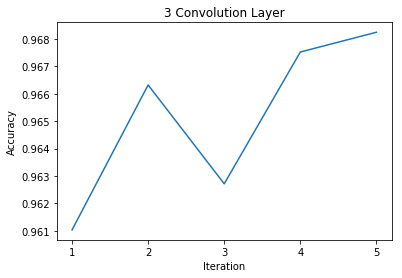

In [28]:
acc3=[]
# Train the model
for i  in range(1,6):
    train_input_fn = tf.estimator.inputs.numpy_input_fn(
        x={"x": sample_train_data},
        y=sample_train_labels,
        batch_size=5*i,
        num_epochs=None,
        shuffle=True)
    mnist_classifier.train(
    input_fn=train_input_fn,
    steps=100)
    eval_input_fn = tf.estimator.inputs.numpy_input_fn(
        x={"x": sample_eval_data},
        y=sample_eval_labels,
        batch_size=5*i,
        num_epochs=1,
        shuffle=False)
    eval_results3 = mnist_classifier.evaluate(input_fn=eval_input_fn)
    print("")
    print("For iteration",i," in 3 Convolution Layer with batch size:",5*i," the accuracy is :",eval_results3["accuracy"])
    print("")
    acc3 =np.append(acc3,eval_results3['accuracy'])

print("")

t=[1,2,3,4,5]
x= [i for i in range(len(t))]
plt.plot(acc3)
plt.xlabel("Iteration")
plt.xticks(x,t)
plt.ylabel("Accuracy")
plt.title("3 Convolution Layer")
plt.show()

For this task, I have evaluated the performace for 1 convolution layer, 2 convolution layers and 3 convolution layers by training the model with different batch sizes. In each iteration, the batch size is changing and the accuracies are increasing proportionaly for all 1,2 and 3 convolution layer network. For one convolution layer the accuracy is not growing exponentially there is minor difference in the accuracies of each iteration. But the for two convolution layer we notice the accuracy is growing exponentially with 0.3 in first iteratition to 0.9 in last itertation. However, there is not constant patter in accuracies of 3 convolution layer network as it is dropping at third iteration but we can notice the drop is not significant as it only reduces too 0.966 to 0.963.